In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

# you may need to change the following depending on where you uploaded the file
%cd '/content/drive/MyDrive/Colab Notebooks/DS340W'
!pwd #Prints the present working directory

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/DS340W
/content/drive/MyDrive/Colab Notebooks/DS340W


In [3]:
df = pd.read_csv('cleaned_property_data.csv')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  amenities            1615 non-null   object 
 11  maid_room            1905 non-null   bool   
 12  unfurnished          1905 non-null   bool   
 13  balcony              1905 non-null   bool   
 14  barbecue_area        1905 non-null   bool   
 15  built_in_wardrobes   1905 non-null   b

In [4]:
df = df.drop('amenities', axis= 1)

In [5]:
df['quality'].unique()


array(['Medium', 'Low', 'High', 'Ultra'], dtype=object)

## **Encode Categorical data**

In [6]:
# Define the ordinal mapping dictionary
ordinal_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Ultra': 3
}

# Apply ordinal encoding to the 'quality' column
df['quality'] = df['quality'].map(ordinal_mapping)

df = pd.get_dummies(df, columns = ['neighborhood'])
print(df)

           id   latitude  longitude    price  size_in_sqft  price_per_sqft  \
0     5528049  25.113208  55.138932  2700000          1079         2502.32   
1     6008529  25.106809  55.151201  2850000          1582         1801.52   
2     6034542  25.063302  55.137728  1150000          1951          589.44   
3     6326063  25.227295  55.341761  2850000          2020         1410.89   
4     6356778  25.114275  55.139764  1729200           507         3410.65   
...       ...        ...        ...      ...           ...             ...   
1900  7705450  25.176892  55.310712  1500000          1087         1379.94   
1901  7706287  25.166145  55.276684  1230000           760         1618.42   
1902  7706389  25.206500  55.345056  2900000          1930         1502.59   
1903  7706591  25.073858  55.229844   675000           740          912.16   
1904  7706643  25.079130  55.154713   760887           800          951.11   

      no_of_bedrooms  no_of_bathrooms  quality  maid_room  ... 

# **Decision Tree Regressor**

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

# Load and prepare the data
data = df

# Selecting a subset of features
selected_features = ['latitude', 'longitude', 'size_in_sqft', 'no_of_bedrooms', 'no_of_bathrooms', 'quality']
X = data[selected_features]
y = data['price']

# Encode 'quality' if it's categorical
if X['quality'].dtype == 'object':
    encoder = LabelEncoder()
    X['quality'] = encoder.fit_transform(X['quality'])

# Splitting the data
X_seen, X_unseen, y_seen, y_unseen = train_test_split(X, y, test_size=0.20, random_state=51)
X_train, X_test, y_train, y_test = train_test_split(X_seen, y_seen, test_size=0.20, random_state=51)

# Decision Tree Model with even more limited complexity
dt_regressor = DecisionTreeRegressor(max_depth=2, random_state=42)
dt_regressor.fit(X_train, y_train)

# Predictions
y_pred_test = dt_regressor.predict(X_test)
y_pred_unseen = dt_regressor.predict(X_unseen)

# R^2 score
r2_decision_tree_test = r2_score(y_test, y_pred_test)
r2_decision_tree_unseen = r2_score(y_unseen, y_pred_unseen)

print("R^2 Score for Test Data:", r2_decision_tree_test)
print("R^2 Score for Unseen Data:", r2_decision_tree_unseen)


R^2 Score for Test Data: 0.7245435180783493
R^2 Score for Unseen Data: 0.663161668681647


# **Random Forest**

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Assuming df is your DataFrame after preprocessing
data = df

# Selecting a subset of features
selected_features = ['latitude', 'longitude', 'size_in_sqft', 'no_of_bedrooms', 'no_of_bathrooms', 'quality']
X = data[selected_features]
y = data['price']

# Encode 'quality' if it's categorical
if X['quality'].dtype == 'object':
    encoder = LabelEncoder()
    X['quality'] = encoder.fit_transform(X['quality'])

# Splitting the data
X_seen, X_unseen, y_seen, y_unseen = train_test_split(X, y, test_size=0.20, random_state=51)
X_train, X_test, y_train, y_test = train_test_split(X_seen, y_seen, test_size=0.20, random_state=51)

# Model
rf_regressor = RandomForestRegressor(n_estimators=5, max_depth=3, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predictions
y_pred_test = rf_regressor.predict(X_test)
y_pred_unseen = rf_regressor.predict(X_unseen)

# R^2 score
r2_random_forest_test = r2_score(y_test, y_pred_test)
r2_random_forest_unseen = r2_score(y_unseen, y_pred_unseen)

print("R^2 Score for Test Data:", r2_random_forest_test)
print("R^2 Score for Unseen Data:", r2_random_forest_unseen)



R^2 Score for Test Data: 0.7488016085449163
R^2 Score for Unseen Data: 0.7704377258576538


# **KNN**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Copy the dataset
data = df

# Selecting a balanced set of features
selected_features = ['latitude', 'longitude', 'size_in_sqft', 'no_of_bedrooms']
X = data[selected_features]
y = data['price']

# Splitting the data
X_seen, X_unseen, y_seen, y_unseen = train_test_split(X, y, test_size=0.20, random_state=51)
X_train, X_test, y_train, y_test = train_test_split(X_seen, y_seen, test_size=0.20, random_state=51)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_unseen_scaled = scaler.transform(X_unseen)

# KNN Model
knn_regressor = KNeighborsRegressor(n_neighbors=400)
knn_regressor.fit(X_train_scaled, y_train)

# Predictions
y_pred_test = knn_regressor.predict(X_test_scaled)
y_pred_unseen = knn_regressor.predict(X_unseen_scaled)

# R^2 score
r2_knn_test = r2_score(y_test, y_pred_test)
r2_knn_unseen = r2_score(y_unseen, y_pred_unseen)

print("R^2 Score for Test Data:", r2_knn_test)
print("R^2 Score for Unseen Data:", r2_knn_unseen)

R^2 Score for Test Data: 0.19070719114796886
R^2 Score for Unseen Data: 0.24853573212009328


# **Linear Regression**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Copy the dataset
data = df

selected_features = ['price_per_sqft']
X = data[selected_features]
y = data['price']

# Splitting the data
X_seen, X_unseen, y_seen, y_unseen = train_test_split(X, y, test_size=0.20, random_state=51)
X_train, X_test, y_train, y_test = train_test_split(X_seen, y_seen, test_size=0.20, random_state=51)

# Linear Regression Model
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

# Predictions
y_pred_test = lr_regressor.predict(X_test)
y_pred_unseen = lr_regressor.predict(X_unseen)

# R^2 score
r2_linear_regression_test = r2_score(y_test, y_pred_test)
r2_linear_regression_unseen = r2_score(y_unseen, y_pred_unseen)

print("R^2 Score for Test Data:", r2_linear_regression_test)
print("R^2 Score for Unseen Data:", r2_linear_regression_unseen)

R^2 Score for Test Data: 0.5035971118715181
R^2 Score for Unseen Data: 0.5057545918775721


# **Support Vector Regression**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Load the data
data = df


# Assuming 'size_in_sqft' as the numeric feature (update as needed if you have other prepared numeric features)
selected_features = ['size_in_sqft']
X = data[selected_features]
y = data['price']

# Splitting the data into seen and unseen datasets
X_seen, X_unseen, y_seen, y_unseen = train_test_split(X, y, test_size=0.20, random_state=51)

# Further split the seen data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_seen, y_seen, test_size=0.20, random_state=51)

# SVR Model with simplified settings
svr_regressor = SVR(kernel='linear', C=0.01, epsilon=1)
svr_regressor.fit(X_train, y_train)

# Making predictions on both test and unseen data
y_pred_test = svr_regressor.predict(X_test)
y_pred_unseen = svr_regressor.predict(X_unseen)

# Calculating R^2 score for both test and unseen data
r2_test = r2_score(y_test, y_pred_test)
r2_unseen = r2_score(y_unseen, y_pred_unseen)

print("R^2 Score for Test Data:", r2_test)
print("R^2 Score for Unseen Data:", r2_unseen)


R^2 Score for Test Data: 0.41482607240182745
R^2 Score for Unseen Data: 0.41475664131897483


# **Boosted Regression Trees**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Copy the dataset
data = df

# Selecting a set of features
selected_features = ['size_in_sqft', 'no_of_bedrooms', 'latitude', 'longitude']
X = data[selected_features]
y = data['price']

# Splitting the data
X_seen, X_unseen, y_seen, y_unseen = train_test_split(X, y, test_size=0.20, random_state=51)
X_train, X_test, y_train, y_test = train_test_split(X_seen, y_seen, test_size=0.20, random_state=51)

# Gradient Boosting Regressor Model with adjusted parameters
gbr_regressor = GradientBoostingRegressor(n_estimators=50, learning_rate=0.021, max_depth=3, random_state=42)
gbr_regressor.fit(X_train, y_train)

# Predictions
y_pred_test = gbr_regressor.predict(X_test)
y_pred_unseen = gbr_regressor.predict(X_unseen)

# R^2 score
r2_gbr_test = r2_score(y_test, y_pred_test)
r2_gbr_unseen = r2_score(y_unseen, y_pred_unseen)

print("R^2 Score for Test Data:", r2_gbr_test)
print("R^2 Score for Unseen Data:", r2_gbr_unseen)

R^2 Score for Test Data: 0.7102279570652754
R^2 Score for Unseen Data: 0.645337100173915


# **Lasso Regression**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the data
data = df

# Selecting fewer features for simplification
selected_features = ['size_in_sqft', 'no_of_bedrooms']  # Reduced feature set
X = data[selected_features]
y = data['price']

# Splitting the data
X_seen, X_unseen, y_seen, y_unseen = train_test_split(X, y, test_size=0.20, random_state=51)
X_train, X_test, y_train, y_test = train_test_split(X_seen, y_seen, test_size=0.20, random_state=51)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_unseen_scaled = scaler.transform(X_unseen)

# Lasso Regression Model with manually set alpha
lasso_regressor = Lasso(alpha=50)  # Manually adjust this alpha value to control regularization
lasso_regressor.fit(X_train_scaled, y_train)

# Predictions
y_pred_test = lasso_regressor.predict(X_test_scaled)
y_pred_unseen = lasso_regressor.predict(X_unseen_scaled)

# R^2 score
r2_lasso_test = r2_score(y_test, y_pred_test)
r2_lasso_unseen = r2_score(y_unseen, y_pred_unseen)

print("R^2 Score for Test Data:", r2_lasso_test)
print("R^2 Score for Unseen Data:", r2_lasso_unseen)



R^2 Score for Test Data: 0.7378696519989901
R^2 Score for Unseen Data: 0.669312916408644


# **Elastic Regression**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the data
data = df

# Selecting a simplified set of features for clarity and control
selected_features = ['size_in_sqft', 'no_of_bedrooms']  # Simplified feature set
X = data[selected_features]
y = data['price']

# Splitting the data
X_seen, X_unseen, y_seen, y_unseen = train_test_split(X, y, test_size=0.20, random_state=51)
X_train, X_test, y_train, y_test = train_test_split(X_seen, y_seen, test_size=0.20, random_state=51)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_unseen_scaled = scaler.transform(X_unseen)

# Elastic Net Regression Model with manually set alpha and l1_ratio
elastic_net_regressor = ElasticNet(alpha=0.5, l1_ratio=0.5)  # These parameters can be adjusted
elastic_net_regressor.fit(X_train_scaled, y_train)

# Predictions
y_pred_test = elastic_net_regressor.predict(X_test_scaled)
y_pred_unseen = elastic_net_regressor.predict(X_unseen_scaled)

# R^2 score
r2_elastic_net_test = r2_score(y_test, y_pred_test)
r2_elastic_net_unseen = r2_score(y_unseen, y_pred_unseen)

print("R^2 Score for Test Data:", r2_elastic_net_test)
print("R^2 Score for Unseen Data:", r2_elastic_net_unseen)


R^2 Score for Test Data: 0.6488610560802768
R^2 Score for Unseen Data: 0.6317460066579315


# **Comparison**

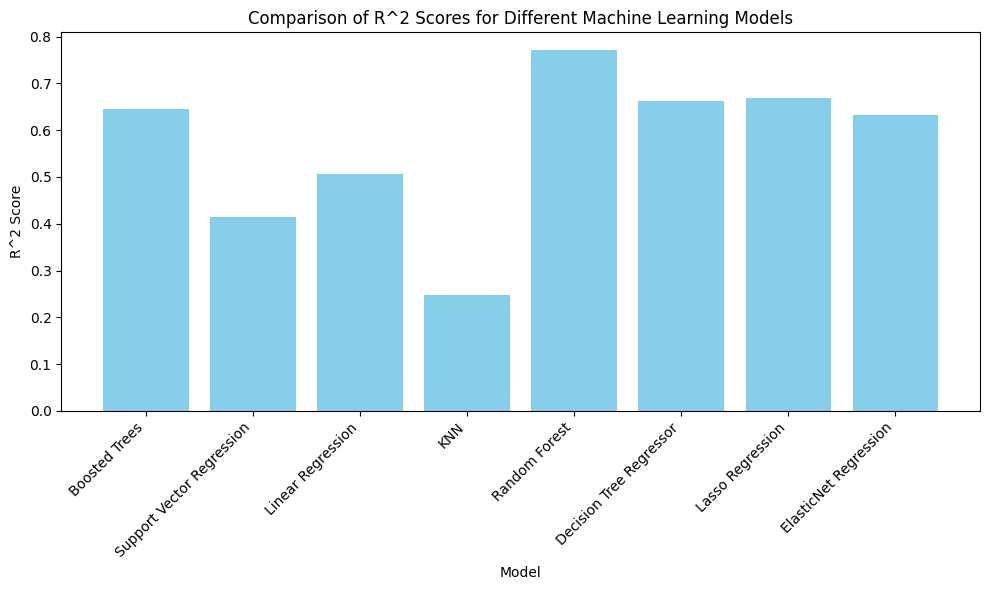

In [17]:
import matplotlib.pyplot as plt

# List of model names
models = ['Boosted Trees', 'Support Vector Regression', 'Linear Regression',
          'KNN', 'Random Forest', 'Decision Tree Regressor', 'Lasso Regression', 'ElasticNet Regression']

# Corresponding R^2 scores (values from your analysis results)
r2_scores = [0.645337100173915, 0.41475664131897483, 0.5057545918775721,
             0.24853573212009328, 0.7704377258576538, 0.663161668681647,
             0.669312916408644, 0.6317460066579315]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.title('Comparison of R^2 Scores for Different Machine Learning Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()